In [1]:
import os
os.listdir("../data")

['sample.nc4']

In [9]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = xr.open_dataset("../data/sample.nc4");
data

<xarray.Dataset> Size: 3MB
Dimensions:   (time: 1, lat: 361, lon: 576)
Coordinates:
  * lat       (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon       (lon) float64 5kB -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * time      (time) datetime64[ns] 8B 2021-12-01T12:00:00
Data variables:
    XCO2      (time, lat, lon) float64 2MB ...
    XCO2PREC  (time, lat, lon) float64 2MB ...
Attributes: (12/25)
    RangeBeginningDate:             2021-12-01
    RangeBeginningTime:             00:00:00.000000
    RangeEndingDate:                2021-12-01
    RangeEndingTime:                23:59:99.999999
    SpatialCoverage:                global
    SouthBoundingCoordinate:        -90.0
    ...                             ...
    LongName:                       OCO-2 GEOS Level 3 daily, 0.5x0.625 assim...
    Title:                          OCO-2 GEOS Level 3 daily, 0.5x0.625 assim...
    IdentifierProductDOI:           10.5067/Y9M4NM9MPCGH
    IdentifierProductDOIAuthority:  http://doi.org/
    Institution:                    NASA GSFC Global Modeling and Assimilatio...
    Contact:                        Brad Weir (brad.weir@nasa.gov)

In [3]:
attributes = data.attrs
coordinates = data.coords
values = data.data_vars
data["XCO2"]

<xarray.DataArray 'XCO2' (time: 1, lat: 361, lon: 576)> Size: 2MB
[207936 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 5kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time     (time) datetime64[ns] 8B 2021-12-01T12:00:00
Attributes:
    units:      mol CO2/mol dry
    long_name:  Assimilated dry-air column average CO2 daily mean

In [4]:
conc_val = data["XCO2"].values
lat_val = data.coords["lat"].values
lon_val = data.coords["lon"].values

In [5]:
conc = np.array(conc_val)[0]
lat = np.round(np.array(lat_val),1)
lon = np.round(np.array(lon_val),10)

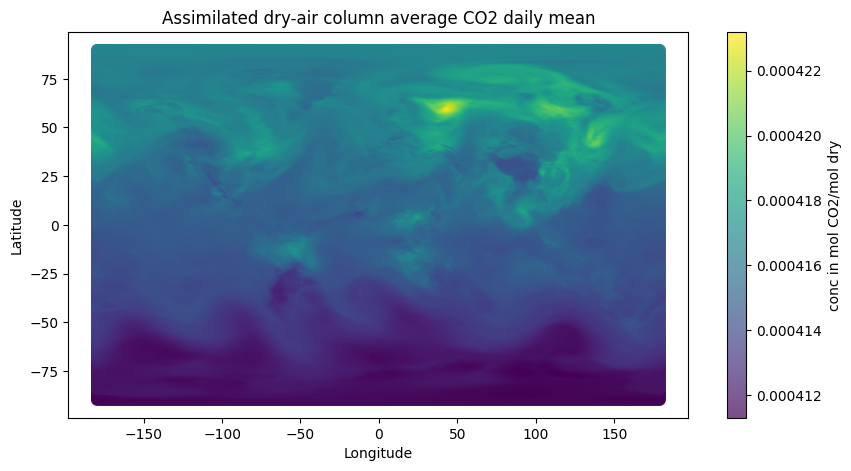

In [6]:
# Create a meshgrid of x and y
X, Y = np.meshgrid(lon, lat)

# Calculate the aspect ratio of the data
aspect_ratio = (X.max() - X.min()) / (Y.max() - Y.min())

# Set the figure size based on the aspect ratio
fig_width = 10
fig_height = fig_width / aspect_ratio

# Plot scatter plot with a maintained aspect ratio
plt.figure(figsize=(fig_width, fig_height))
plt.scatter(X.flatten(), Y.flatten(), c=conc.flatten(), cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='conc in mol CO2/mol dry')
plt.title('Assimilated dry-air column average CO2 daily mean')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()